In [66]:
#Necessary modules 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

CSV file is uploaded in Google Colab

In [3]:
from google.colab import files
uploaded = files.upload()

Saving SolarPrediction.csv to SolarPrediction.csv


The uploaded file is read using read_csv function

In [55]:
import io
data = pd.read_csv(io.BytesIO(uploaded['SolarPrediction.csv']))
data.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00


This dataset is about the solar raidation and it's realtionship between time, temperature,pressure,humidity,speed and wid direction.Here radiation is the dependent variables where as rest datas are indepenent variables.

**Analyzing** **Data**

Analyzing the data gives us the information about the dataset. We can check the relationship of datas.

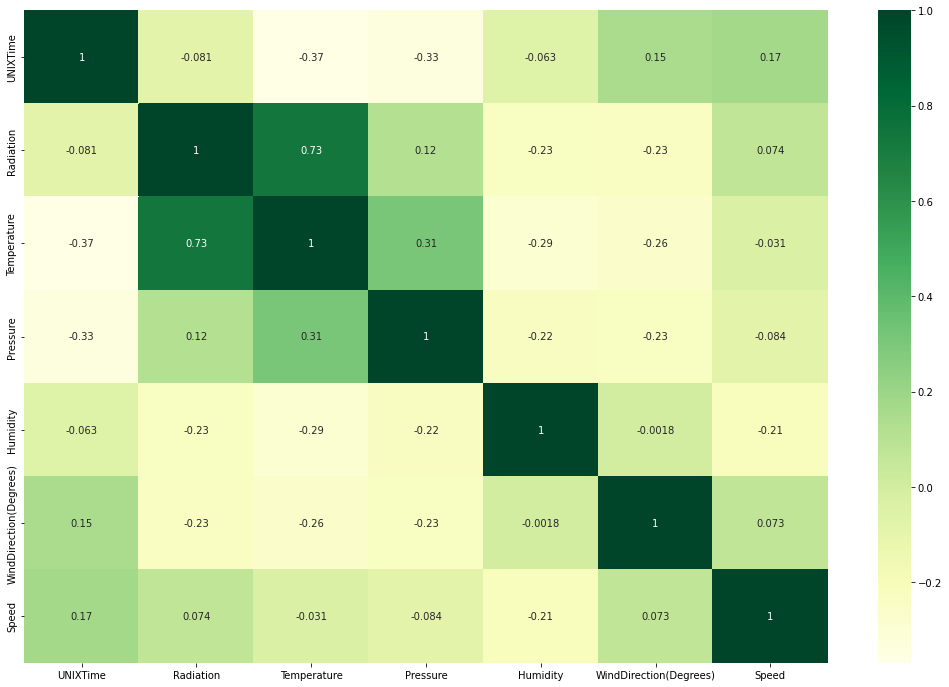

In [56]:
plt.figure(figsize=(18,12))
sns.heatmap(data.corr(), yticklabels='auto', annot=True, cmap='YlGn')
plt.show()

The heatmap shows the correlation of the data. The values shows the relationship betwwen the data. Higher values have high correlation.

In [57]:
df = data


We do not want to edit the original dataset so we store the original dataset into df where we do the processiog.

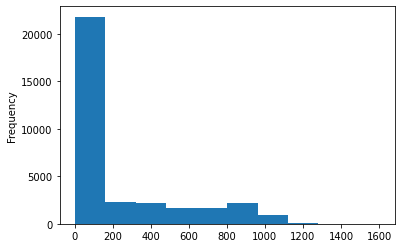

In [58]:
df["Radiation"].plot.hist()

This is the histogram of the radiation values. Here it is clear that the most of the data ranges from 0 to 200.

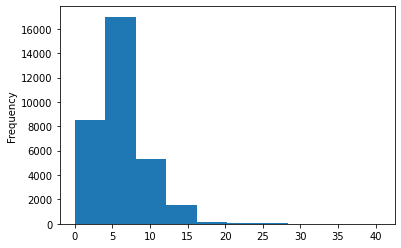

In [59]:
df["Speed"].plot.hist()

This is the histogram of Speed and it is clear that most data ranges from 4-8.

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32686 entries, 0 to 32685
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   UNIXTime                32686 non-null  int64  
 1   Data                    32686 non-null  object 
 2   Time                    32686 non-null  object 
 3   Radiation               32686 non-null  float64
 4   Temperature             32686 non-null  int64  
 5   Pressure                32686 non-null  float64
 6   Humidity                32686 non-null  int64  
 7   WindDirection(Degrees)  32686 non-null  float64
 8   Speed                   32686 non-null  float64
 9   TimeSunRise             32686 non-null  object 
 10  TimeSunSet              32686 non-null  object 
dtypes: float64(4), int64(3), object(4)
memory usage: 2.7+ MB


This gives the information of the index present in the dataset.

**Data Wrangling**

Data Wrangling is the process where we remove the unnecessary values and filter out the data.

In [61]:
df.isnull()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
32681,False,False,False,False,False,False,False,False,False,False,False
32682,False,False,False,False,False,False,False,False,False,False,False
32683,False,False,False,False,False,False,False,False,False,False,False
32684,False,False,False,False,False,False,False,False,False,False,False


This will give true result if the data has null value or nan value.

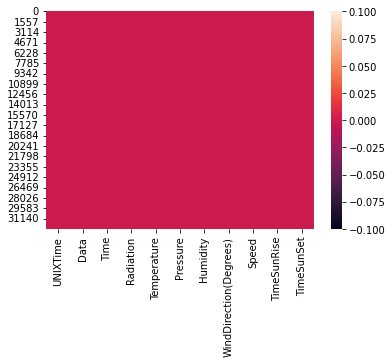

In [68]:
sns.heatmap(df.isnull())

This is the heatmap to check weather our data contains nan value or not.

In [18]:
df.rename(columns={'WindDirection(Degrees)': 'WindDirection'},inplace=True, errors='raise')   
df.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection,Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00


Here wind direction is renamed for easier processing.

In [25]:
df['radiation'] = df['Radiation']
df.drop(['Radiation'], axis=1, inplace=True)
df.head()

,UNIXTime,Data,Time,Temperature,Pressure,Humidity,WindDirection,Speed,TimeSunRise,TimeSunSet,radiation
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,48,30.46,59,177.39,5.62,06:13:00,18:13:00,1.21
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,48,30.46,58,176.78,3.37,06:13:00,18:13:00,1.21
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,48,30.46,57,158.75,3.37,06:13:00,18:13:00,1.23
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,48,30.46,60,137.71,3.37,06:13:00,18:13:00,1.21
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,48,30.46,62,104.95,5.62,06:13:00,18:13:00,1.17


Here Radiation is stored in radiation and Radiation column is removed.

In [26]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder() 
df.UNIXTime= le.fit_transform(df.UNIXTime)
df.Data=le.fit_transform(df.Data)
df.Time = le.fit_transform(df.Time)
df.TimeSunRise = le.fit_transform(df.TimeSunRise)
df.TimeSunSet = le.fit_transform(df.TimeSunSet)

df.head()

,UNIXTime,Data,Time,Temperature,Pressure,Humidity,WindDirection,Speed,TimeSunRise,TimeSunSet,radiation
0,7416,110,8288,48,30.46,59,177.39,5.62,6,30,1.21
1,7415,110,8257,48,30.46,58,176.78,3.37,6,30,1.21
2,7414,110,8228,48,30.46,57,158.75,3.37,6,30,1.23
3,7413,110,8194,48,30.46,60,137.71,3.37,6,30,1.21
4,7412,110,8168,48,30.46,62,104.95,5.62,6,30,1.17


This is the pre processiong module where all the non numerical values are changed into numeric value that can be understood by the algorithm.

In [48]:
x = df.drop("radiation", axis=1)
y = df["radiation"]

print(x.head())
print(y.head())

   UNIXTime  Data  Time  ...  Speed  TimeSunRise  TimeSunSet
0      7416   110  8288  ...   5.62            6          30
1      7415   110  8257  ...   3.37            6          30
2      7414   110  8228  ...   3.37            6          30
3      7413   110  8194  ...   3.37            6          30
4      7412   110  8168  ...   5.62            6          30

[5 rows x 10 columns]
0    1.21
1    1.21
2    1.23
3    1.21
4    1.17
Name: radiation, dtype: float64


This is where we separate the independent and dependent values. x is independent value whereas y is dependent value.

**Training Dataset**

Dataset are split into two groups where one group trains the data set and other tests he data set.

In [49]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3, random_state=0)

Here test size is 0.3 that means that the 30 percent of the dataset is used to test the accuracy of the linear regression.

In [50]:
from sklearn.linear_model import LinearRegression
ml = LinearRegression()
ml.fit(x_train,y_train)

LinearRegression()

We import linear regression and fit the training dataset in the linear regression function.

In [51]:
y_pred = ml.predict(x_test)
print(y_pred)


[574.73585237 173.05695793 681.4743475  ...   2.16957563 104.05245505
 -17.00287943]


This gives the predicted value after training.

In [47]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.718329474268254

r2 score shows the accuracy of out linear regression. Here test data and predicted data are compared to find the accuracy.

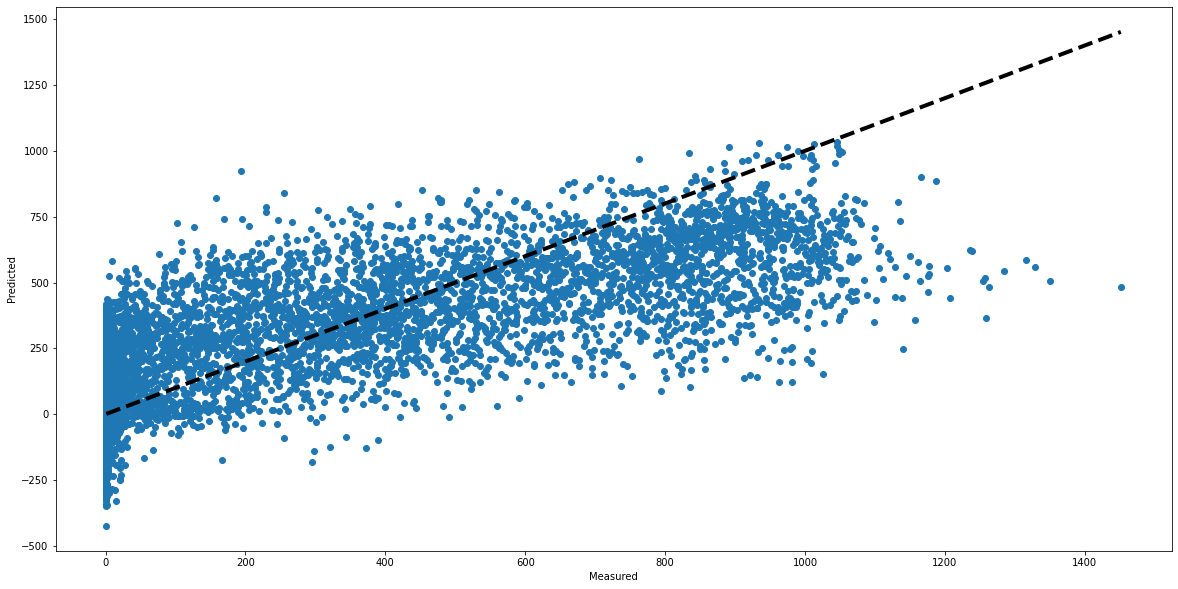

In [52]:
fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)
ax.scatter(y_test, y_pred)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

This figure shows the regression line the best fits our chart.